## Logistic Regression Project 

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data


In [3]:
ad_data = pd.read_csv("advertising.csv")

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [17]:
ad_data["Timestamp"] = pd.to_datetime(ad_data["Timestamp"])

In [18]:
ad_data["Timestamp"]

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
5     2016-05-19 14:30:17
6     2016-01-28 20:59:32
7     2016-03-07 01:40:15
8     2016-04-18 09:33:42
9     2016-07-11 01:42:51
10    2016-03-16 20:19:01
11    2016-05-08 08:10:10
12    2016-06-03 01:14:41
13    2016-04-20 21:49:22
14    2016-03-24 09:31:49
15    2016-03-09 03:41:30
16    2016-01-30 19:20:41
17    2016-05-02 07:00:58
18    2016-02-13 07:53:55
19    2016-02-27 04:43:07
20    2016-01-05 07:52:48
21    2016-03-18 13:22:35
22    2016-05-20 08:49:33
23    2016-03-23 09:43:43
24    2016-06-13 17:27:09
25    2016-05-27 15:25:52
26    2016-02-08 10:46:14
27    2016-07-19 08:32:10
28    2016-04-14 05:08:35
29    2016-01-27 12:38:16
              ...        
970   2016-06-25 04:21:33
971   2016-01-27 14:41:10
972   2016-05-16 18:51:59
973   2016-02-27 20:20:25
974   2016-02-28 23:54:44
975   2016-06-13 06:11:33
976   2016-05-05 11:07:13
977   2016-0

In [20]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis


In [35]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


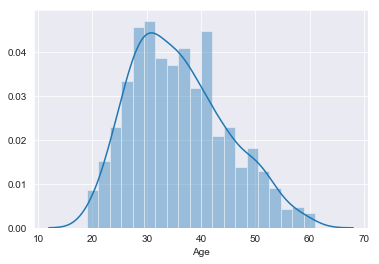

In [81]:
sns.set_style("darkgrid")
sns.distplot(ad_data["Age"],bins = 20)

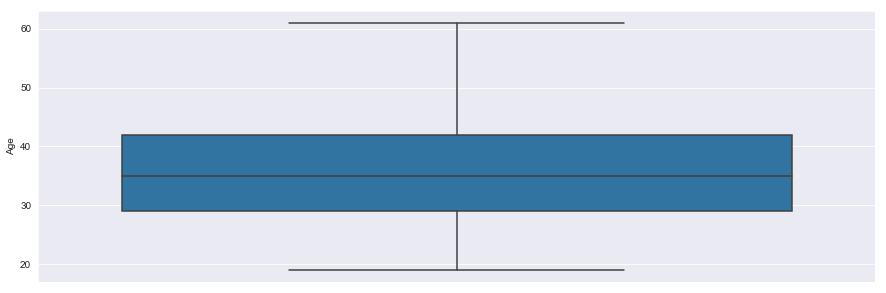

In [86]:
plt.figure(figsize=(15,5))
sns.boxplot(y = ad_data['Age'])

**A jointplot showing Area Income versus Age.**

1. Most consumers are within the age of 28-40
2. As consumers gets older there income reduces

<Figure size 1080x360 with 0 Axes>

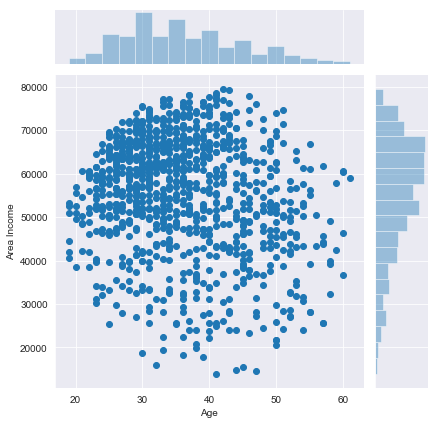

In [51]:
plt.figure(figsize=(15,5))

sns.jointplot(x = "Age",y = "Area Income",data = ad_data,kind = "scatter")

**A jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

Observation
1. As consumer gets old the spend less time on the internet

**A jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

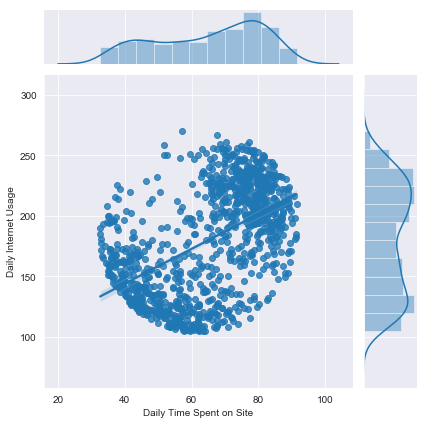

In [64]:
sns.jointplot(x = 'Daily Time Spent on Site',y = "Daily Internet Usage",data =ad_data,kind = "reg")

Observation
1. As the internet usage increases the amount of time spent increases

**A pairplot with the hue defined by the 'Clicked on Ad' column feature.**

Observation
1. Young people do not really click on the ads

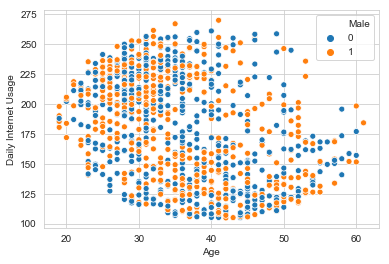

In [79]:
sns.scatterplot(x = "Age",y = "Daily Internet Usage",data = ad_data,hue = "Male")

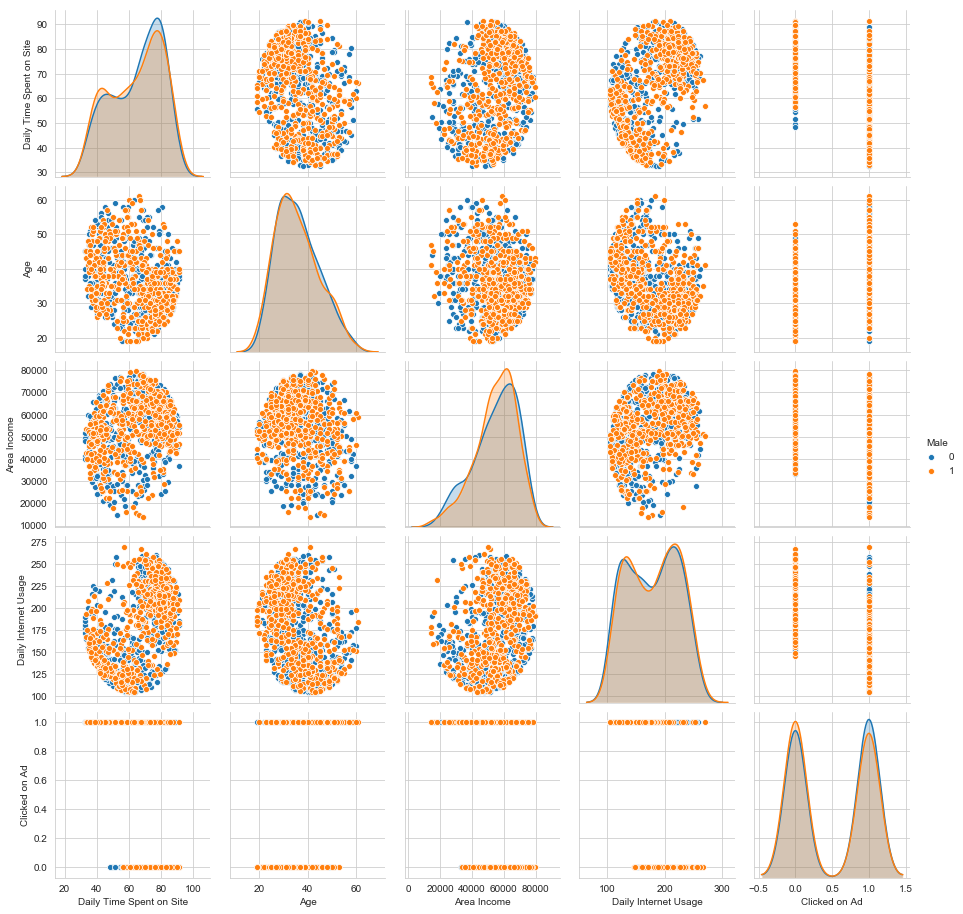

In [78]:
sns.set_style("whitegrid")
sns.pairplot(ad_data,hue = "Male")

# Logistic Regression


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [106]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
click = LogisticRegression()

In [146]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

** Training and fitting a logistic regression model on the training set.**

In [147]:
click.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
click.coef_

array([[-4.45816498e-02,  2.18379839e-01, -7.63621393e-06,
        -2.45264007e-02,  1.13334440e-03]])

## Predictions and Evaluations


In [149]:
prediction = click.predict(X_test)

In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

